## **Sentiment Analysis: Overview**
Sentiment analysis involves using Natural Language Processing (NLP) and machine learning to classify text as positive, negative, or neutral. It has applications in understanding public opinion, product feedback, and, in your case, the reception of movies.

## Process for Sentiment Analysis:

### Data Collection:
- Collect text data (YouTube comments, reviews, etc.).

### Preprocessing:
- Remove stop words, punctuation, and unnecessary details.
- Convert text to lowercase.
- Tokenize (split sentences into words).

### Feature Extraction:
- Use TF-IDF (Term Frequency-Inverse Document Frequency) to represent text numerically.

### Classification:
- Train a machine learning model like Naive Bayes to classify comments as positive or negative.


## TF-IDF + Naive Bayes Classifier:

### TF-IDF:
Measures the importance of a word in a document relative to a corpus.

**Formula:**
- **Term Frequency (TF):** Frequency of a term in a document.
- **Inverse Document Frequency (IDF):** Logarithm of the total number of documents divided by the number of documents containing the term.
- **TF-IDF = TF × IDF**

TF-IDF converts comments into a vector format usable by machine learning algorithms.

### Naive Bayes:
A probabilistic classifier that uses Bayes' theorem. It assumes that the presence of one word is independent of another (hence "naive").


In [17]:
import pandas as pd

df = pd.read_csv("FinalCleaned.csv")
display(df)

,Movie Name,Comment,IMDb Rating,Sentiment,Verdict
0,1917,Can't believe they made a whole Movie about ho...,8.3,Neutral,Hit
1,1917,The best part about this movie is how every au...,8.3,Positive,Hit
2,1917,crazy how this came out 87 years ago and it lo...,8.3,Positive,Hit
3,1917,The scene with the flares lighting up the ruin...,8.3,Negative,Hit
4,1917,The ending when he ran across the trench was ...,8.3,Neutral,Hit
...,...,...,...,...,...
32156,Wonder Woman 1984,Yup. Just imagine a coherent interesting stor...,6.5,Positive,Average
32157,Wonder Woman 1984,Watch it be a “Modern Warfare” or “Rise of Sky...,6.5,Positive,Average
32158,Wonder Woman 1984,"Mohammad hosseini Money, but I’m so confused, ...",6.5,Negative,Average
32159,Wonder Woman 1984,@joshiewashe9486 Watch it have thor ragnarok...,6.5,Neutral,Average


In [18]:
!pip install emoji
from PreProcess import PreProcess

preprocess = PreProcess()
preprocessed_data_ready_for_training = preprocess.preprocess_dataframe(df)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/586.9 kB ? eta -:--:--
    --------------------------------------- 10.2/586.9 kB ? eta -:--:--
   ---- ---------------------------------- 61.4/586.9 kB 825.8 kB/s eta 0:00:01
   ----------------------------- ---------- 430.1/586.9 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 586.9/586.9 kB 4.6 MB/s eta 0:00:00
Can't believe they made a whole Movie about how my parents got to school
The best part about this movie is how every audience is fooled into believing who the real Lead Actor is in this movie.
crazy how this came out 87 years ago and it looks this good. impressive.
The scene with the flares lighting up the ruined village was insane, cinematic masterpiece.
The ending when he ran across the  trench was absolutely amaizing
Anyone else come back to watch the trailer after witnessing the movie? Truly a masterpiece to the start of a new decade
This trailer has more edits than the entire film. And is probably the bes

In [19]:
display(preprocessed_data_ready_for_training)

,Movie Name,Comment,IMDb Rating,Sentiment,Verdict
0,1917,ca believe made whole movie parent got school,8.3,Neutral,Hit
1,1917,best part movie every audience fooled believin...,8.3,Positive,Hit
2,1917,crazy came 87 year ago look good impressive,8.3,Positive,Hit
3,1917,scene flare lighting ruined village insane cin...,8.3,Negative,Hit
4,1917,ending ran across trench absolutely amaizing,8.3,Neutral,Hit
...,...,...,...,...,...
32156,Wonder Woman 1984,yup imagine coherent interesting story good ac...,6.5,Positive,Average
32157,Wonder Woman 1984,watch modern warfare rise skywalker script pho...,6.5,Positive,Average
32158,Wonder Woman 1984,mohammad hosseini money confused come,6.5,Negative,Average
32159,Wonder Woman 1984,joshiewashe9486 watch thor ragnarok plot scree...,6.5,Neutral,Average


In [42]:
import os
import pandas as pd
import joblib
from youtube_comment_downloader import YoutubeCommentDownloader, SORT_BY_POPULAR
from PreProcess import PreProcess
from sklearn.feature_extraction.text import TfidfVectorizer

def create_and_save_vectorizer(data, vectorizer_path='model/tfidf_vectorizer.pkl'):
    """
    Creates a TF-IDF vectorizer, fits it to the data, and saves it.

    Args:
        data (pd.Series): Text data to fit the vectorizer.
        vectorizer_path (str): Path to save the vectorizer.

    Returns:
        TfidfVectorizer: The fitted TF-IDF vectorizer.
    """
    print("Creating and fitting TF-IDF vectorizer...")
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    vectorizer.fit(data)
    os.makedirs(os.path.dirname(vectorizer_path), exist_ok=True)
    joblib.dump(vectorizer, vectorizer_path)
    print(f"Vectorizer saved to {vectorizer_path}")
    return vectorizer

create_and_save_vectorizer(preprocessed_data_ready_for_training['Comment'], 'model/tfidf_vectorizer.pkl')

Creating and fitting TF-IDF vectorizer...
Vectorizer saved to model/tfidf_vectorizer.pkl


TfidfVectorizer(max_features=5000, stop_words='english')

Preprocessing data...
Training model...
Making predictions...
Evaluating model...


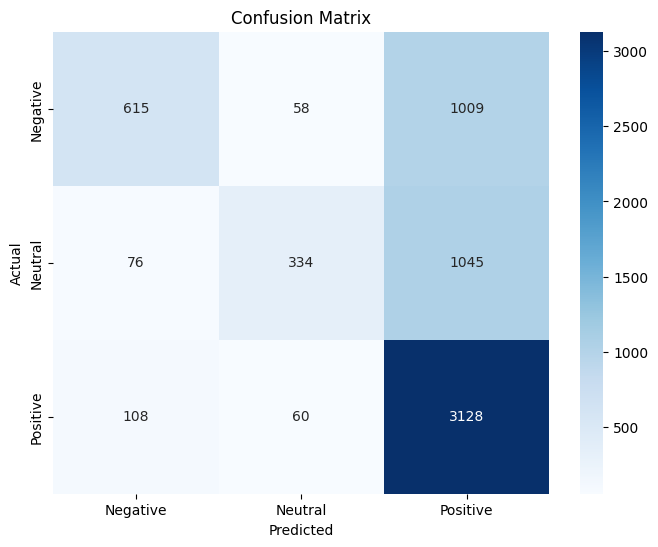

Plotting time analysis...


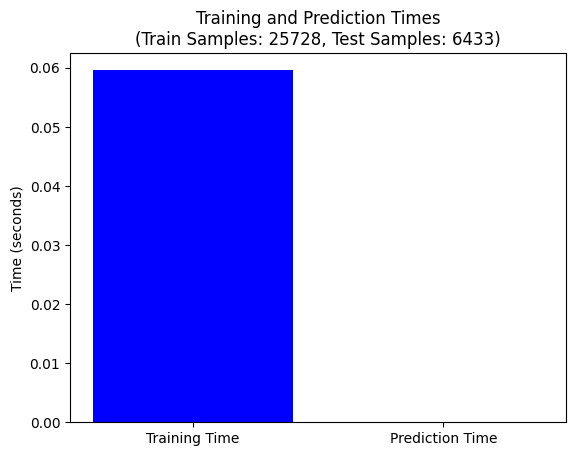

Results:
Training Time: 0.06 seconds
Prediction Time: 0.00 seconds
Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.37      0.50      1682
     Neutral       0.74      0.23      0.35      1455
    Positive       0.60      0.95      0.74      3296

    accuracy                           0.63      6433
   macro avg       0.70      0.51      0.53      6433
weighted avg       0.68      0.63      0.59      6433



In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
import os
import tensorflow as tf


def sentiment_analysis_pipeline(dataset):
    """
    Perform end-to-end sentiment analysis using TF-IDF + Naive Bayes.
    Includes preprocessing, model training, evaluation, and visualization.

    Args:
        dataset (pd.DataFrame): Dataset with columns 'Comment' and 'Sentiment'.

    Returns:
        dict: Evaluation metrics and plots.
    """
    results = {}

    # Step 1: Preprocessing
    print("Preprocessing data...")
    tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
    X = tfidf_vectorizer.fit_transform(dataset['Comment'])
    y = dataset['Sentiment']

    # Step 2: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Model Training
    print("Training model...")
    model = MultinomialNB()
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()
    results['training_time'] = end_train - start_train
    results['num_train_samples'] = X_train.shape[0]

    # Save the model
    os.makedirs('model', exist_ok=True)
    model_path = 'model/sentiment_model.h5'
    joblib.dump(model, model_path)

    # Step 4: Model Prediction
    print("Making predictions...")
    start_pred = time.time()
    y_pred = model.predict(X_test)
    end_pred = time.time()
    results['prediction_time'] = end_pred - start_pred
    results['num_test_samples'] = X_test.shape[0]

    # Step 5: Evaluation Metrics
    print("Evaluating model...")
    results['classification_report'] = classification_report(y_test, y_pred, output_dict=True)
    results['confusion_matrix'] = confusion_matrix(y_test, y_pred)

    # Plot Training and Validation Curve
    os.makedirs('metrics', exist_ok=True)
    plt.figure(figsize=(8, 6))
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('metrics/confusion_matrix.png')
    plt.show()

    # Step 6: Plot Training Times
    print("Plotting time analysis...")
    plt.figure()
    plt.bar(['Training Time', 'Prediction Time'], [results['training_time'], results['prediction_time']], color=['blue', 'orange'])
    plt.ylabel("Time (seconds)")
    plt.title(f"Training and Prediction Times\n(Train Samples: {results['num_train_samples']}, Test Samples: {results['num_test_samples']})")
    plt.savefig('metrics/training_prediction_times.png')
    plt.show()

    # Step 7: Save Metrics
    print("Results:")
    print(f"Training Time: {results['training_time']:.2f} seconds")
    print(f"Prediction Time: {results['prediction_time']:.2f} seconds")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    return results

results = sentiment_analysis_pipeline(preprocessed_data_ready_for_training)

In [48]:
import os
import pandas as pd
import joblib
from youtube_comment_downloader import YoutubeCommentDownloader, SORT_BY_POPULAR
from PreProcess import PreProcess
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

def predict_sentiment_from_youtube(
    youtube_url, 
    model_1_path='model/model_1.h5', 
    model_2_path='model/model_2.h5', 
    tfidf_model_path='model/sentiment_model.h5',
    vectorizer_path='model/tfidf_vectorizer.pkl'
):
    """
    Downloads YouTube comments, preprocesses them, and predicts sentiment using a selected model.

    Args:
        youtube_url (str): URL of the YouTube video to download comments from.
        model_1_path (str): Path to the first sentiment analysis model.
        model_2_path (str): Path to the second sentiment analysis model.
        tfidf_model_path (str): Path to the TF-IDF Naive Bayes model.
        vectorizer_path (str): Path to the saved TF-IDF vectorizer.

    Returns:
        pd.DataFrame: DataFrame with comments and sentiment predictions.
    """
    # Ask the user to select a model
    print("Choose a model for sentiment analysis:")
    print("1. Model 1 (Basic Naive Bayes Model)")
    print("2. Model 2 (Advanced Neural Network Model)")
    print("3. TF-IDF Naive Bayes Model")
    choice = int(input("Enter your choice (1, 2, or 3): "))

    # Load the chosen model
    if choice == 1:
        print("Loading Model 1...")
        model = joblib.load(model_1_path)
    elif choice == 2:
        print("Loading Model 2...")
        model = tf.keras.models.load_model(model_2_path)
    elif choice == 3:
        print("Loading TF-IDF Naive Bayes Model...")
        model = joblib.load(tfidf_model_path)
        vectorizer = joblib.load(vectorizer_path)
    else:
        raise ValueError("Invalid choice. Please select 1, 2, or 3.")

    # Initialize the YouTube comment downloader
    downloader = YoutubeCommentDownloader()

    # Download comments from the provided YouTube URL
    comments = downloader.get_comments_from_url(youtube_url, sort_by=SORT_BY_POPULAR)

    # Save the comments to a DataFrame
    comments_df = pd.DataFrame(comments)[['Comment']]
    comments_df = comments_df[comments_df['Comment'].apply(lambda x: len(x) > 100)]
    comments_df.rename(columns={'text': 'Comment'}, inplace=True)

    # Preprocess comments
    preprocess = PreProcess()
    preprocessed_data_ready_for_testing = preprocess.preprocess_dataframe(comments_df)

    if choice == 3:
        # Apply TF-IDF vectorization for Model 3
        X = vectorizer.transform(preprocessed_data_ready_for_testing['Comment'])
    else:
        # Use raw comments for Model 1 and Model 2
        X = preprocessed_data_ready_for_testing['Comment']

    # Predict sentiment
    print("Predicting sentiments...")
    predictions = model.predict(X)

    # Save predictions to DataFrame
    preprocessed_data_ready_for_testing['Sentiment'] = predictions

    # Overview of sentiments
    sentiment_counts = preprocessed_data_ready_for_testing['Sentiment'].value_counts()
    print("Sentiment Overview:")
    print(sentiment_counts)

    # Plotting the sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Sentiment', data=preprocessed_data_ready_for_testing, order=preprocessed_data_ready_for_testing['Sentiment'].value_counts().index)
    plt.title('Sentiment Distribution of YouTube Comments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    return preprocessed_data_ready_for_testing

youtube_url = "https://www.youtube.com/watch?v=8ugaeA-nMTc"  
predictions_df = predict_sentiment_from_youtube(youtube_url)
print(predictions_df.head())


Choose a model for sentiment analysis:
1. Model 1 (Basic Naive Bayes Model)
2. Model 2 (Advanced Neural Network Model)
3. TF-IDF Naive Bayes Model
Loading TF-IDF Naive Bayes Model...


KeyError: "None of [Index(['Comment'], dtype='object')] are in the [columns]"